In [1]:
import pandas as pd
import category_encoders as ce
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import seaborn as sns

# Sobre clusterização

1) https://medium.com/turing-talks/clustering-conceitos-básicos-principais-algoritmos-e-aplicação-ace572a062a9

2) https://blog.somostera.com/data-science/clusterização-de-dados

3) https://www.sciencedirect.com/science/article/pii/S0167865509002323

# Pré-processamento

Pré-processamento. Pode envolver:

1) Remoção de outliers: outliers são observações que se desviam significativamente das outras observações no conjunto de dados (seja por ser um valor muito maior ou menor que os demais) e podem distorcer os resultados da clusterização, puxando o centro de um cluster em sua direção ou criando clusters adicionais desnecessários;

2) Normalização de variáveis: a normalização (ou padronização) das variáveis é essencial, especialmente quando as variáveis estão em diferentes escalas ou unidades;

3) Codificação de categorias: para métodos de clusterização que operam em espaço métrico/númerico, como o K-Means, é necessário converter variáveis categóricas em formatos numéricos através de técnicas como codificação One-Hot ou Binary Encoding;

4) Tratamento de valores nulos: valores nulos podem distorcer a análise de clusterização se não forem adequadamente tratados. Estratégias comuns para lidar com valores nulos incluem imputação, onde valores nulos são substituídos por um valor estimado com base em outras observações (média, mediana ou um valor predito por um modelo), e exclusão, onde linhas ou colunas com valores nulos são removidas;

5) Redução de Dimensionalidade: em conjuntos de dados com alta dimensionalidade (muitas colunas), técnicas de redução de dimensionalidade, como PCA (Análise de Componentes Principais) ou t-SNE, podem ser aplicadas para simplificar os dados sem perder informações essenciais. Isso pode melhorar a eficiência computacional e a qualidade dos clusters, facilitando a identificação de estruturas nos dados;


In [4]:
# Leitura do arquivo
data = pd.read_excel("2020-2 a 2023-2(1).xlsx")
#backup = data.copy()

# Print dos nomes das colunas
#data.columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 60 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Data de cadastro                                  332433 non-null  object 
 1   Canal de atendimento                              332406 non-null  object 
 2   Denúncia emergencial                              331996 non-null  object 
 3   Denunciante                                       332388 non-null  object 
 4   Cenário da violação                               331096 non-null  object 
 5   País                                              332369 non-null  object 
 6   UF                                                320538 non-null  object 
 7   Município                                         317770 non-null  object 
 8   Frequência                                        316039 non-null  object 
 9   Iníc

In [6]:
data.head()

,Data de cadastro,Canal de atendimento,Denúncia emergencial,Denunciante,Cenário da violação,País,UF,Município,Frequência,Início das violações,...,Grau de instrução do suspeito,Religião do suspeito,Raça\Cor do suspeito,Etnia do Suspeito,Faixa de renda do suspeito,Vínculo Órgão\PJ do suspeito,sl suspeito ramo,suspeito especificacao etnia,vitima especificacao etnia,Violações
0,2020-07-02 14:18:12,TELEFONICO,NAO,A PROPRIA VITIMA,CASA DA VITIMA,BRASIL,BA,SIMOES FILHO,DIARIAMENTE,HA MAIS DE SEIS MESES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>DIREITOS INDIVIDUAIS>LIBERDADE DE IR...
1,2020-07-03 20:14:07,TELEFONICO,NAO,TERCEIRO,CASA DA VITIMA,BRASIL,DF,BRASILIA,SEMANALMENTE,HA MAIS DE UM ANO,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSIQUICA>AMEACA OU COACAO
2,2020-07-15 19:31:42,TELEFONICO,NAO,A PROPRIA VITIMA,CASA DA VITIMA,BRASIL,CE,FORTALEZA,DIARIAMENTE,HA MAIS DE CINCO ANOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>AGRESSAO OU VIAS DE FATO
3,2020-07-15 14:21:05,TELEFONICO,NAO,TERCEIRO,CASA ONDE RESIDE A VITIMA E O SUSPEITO,BRASIL,PI,BOM PRINCIPIO DO PIAUI,OCASIONALMENTE,HA MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>AGRESSAO OU VIAS DE FATO
4,2020-07-07 17:41:33,TELEFONICO,NAO,A PROPRIA VITIMA,LOCAL DE TRABALHO DA VITIMA,BRASIL,AM,MANAUS,DIARIAMENTE,HA MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>EXPOSICAO DE RISCO A SAUDE


In [7]:
data.isnull().sum()

Data de cadastro                                         0
Canal de atendimento                                    27
Denúncia emergencial                                   437
Denunciante                                             45
Cenário da violação                                   1337
País                                                    64
UF                                                   11895
Município                                            14663
Frequência                                           16394
Início das violações                                 30487
sl quantidade vitimas                                    1
Motivações                                           96272
Relação vítima-suspeito                               4139
sl vitima cadastro                                      75
Sexo da vítima                                        2036
Orientação sexual da vítima                         181518
Faixa etária da vítima                               106

In [8]:
data.notnull().sum()

Data de cadastro                                    332433
Canal de atendimento                                332406
Denúncia emergencial                                331996
Denunciante                                         332388
Cenário da violação                                 331096
País                                                332369
UF                                                  320538
Município                                           317770
Frequência                                          316039
Início das violações                                301946
sl quantidade vitimas                               332432
Motivações                                          236161
Relação vítima-suspeito                             328294
sl vitima cadastro                                  332358
Sexo da vítima                                      330397
Orientação sexual da vítima                         150915
Faixa etária da vítima                              3218

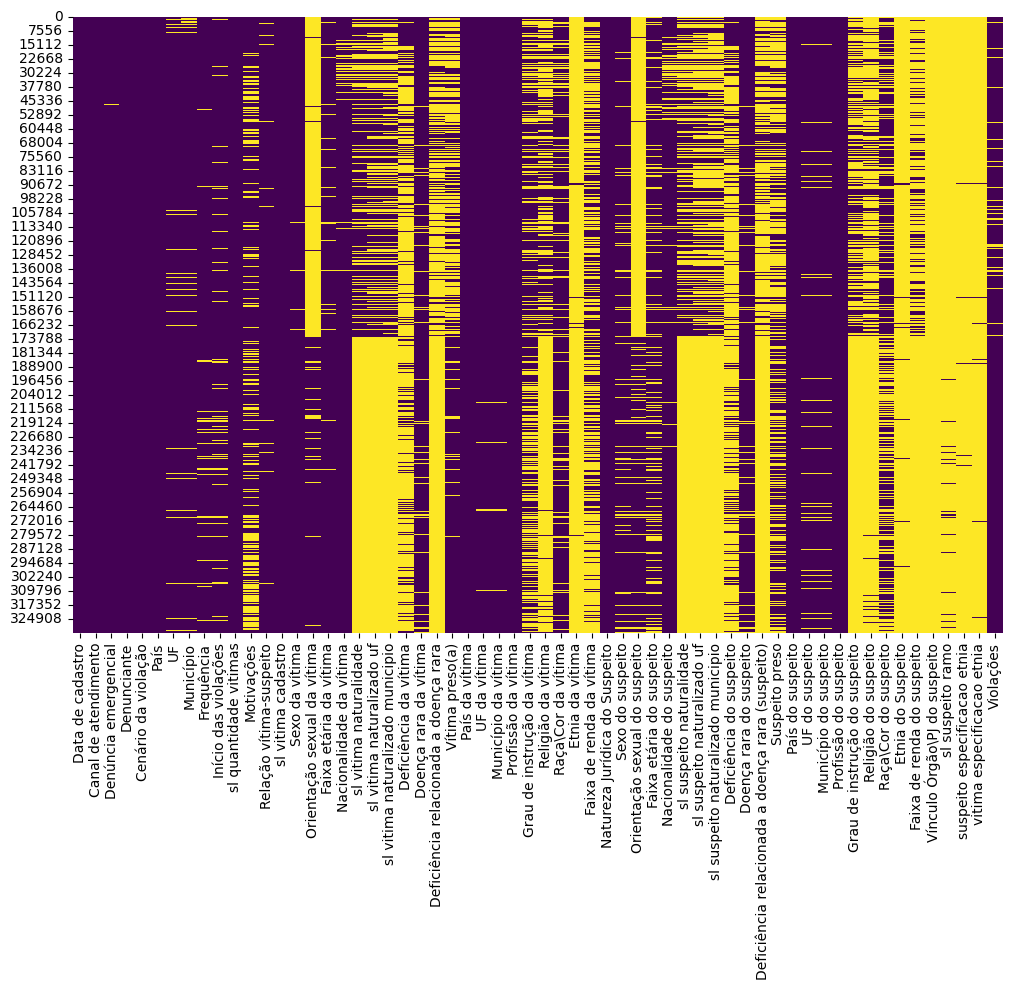

In [9]:
# Visualização dos valores nulos com um heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
def FiltraTabela(df, nullValuesPercentAcceptable, uniqueValuesCountAcceptable): 
    # Define um novo dataset com as colunas que possuem um número de valores nulos e occorrências únicas aceitáveis para a codificação,
    # diminuido assim a dimensionalidade
    selectedColumns = []

    # Padronização de valores ausentes. Define os valores em ausentes como "NULO"
    df = df.applymap(lambda x: "NULO" if pd.isnull(x) else x)

    # Para cada coluna do dataset
    for column in df:
        # Cálculo da porcentagem de valores nulos
        nullValuesPercent = (df[column].value_counts().get('NULO', 0) * 100) / len(df)

        # Cálculo do número de ocorrências únicas
        uniqueValuesCount = df[column].nunique()

        # Prints para verificação
        print(f'Coluna: {column}')
        print(f'Porcentagem de Valores Nulos: {nullValuesPercent:.2f}%')
        print(f'Número de Valores Únicos: {uniqueValuesCount}')

        # Condição para compôr o novo dataset
        if nullValuesPercent < nullValuesPercentAcceptable and uniqueValuesCount < uniqueValuesCountAcceptable:
            selectedColumns.append(column)
            print("Inserido\n")
        else:
            print("Não Inserido\n")

    # Cria uma cópia com as colunas definidas anteriormente.
    dfFiltered = df[selectedColumns].copy()

    # Define todas as colunas do dataset como string
    dfFiltered = dfFiltered.astype(str)

    return dfFiltered



# Escolha do Número de Clusters e Algoritmos de Inicialização 

A determinação do número adequado de clusters é fundamental para a preparação de modelos, principalmente para aqueles que utilizam métodos de clusterização que exigem a definição de uma quantidade préviamente, como o K-Modes e K-Means. 

O número de clusters pode, em alguns casos, ser facilmente determinado a partir do contexto de onde foram tirados os dados. Para dados de vendas de uma loja, por exemplo, o número de clusters pode ser referente ao número de produtos que a loja vende, de maneira que cada cluster representa o perfil do cliente que o consome. 

Se não, métodos como o Elbow Method, o Silhouette Score ou o Davies-Bouldin Index podem ajudar a estimar um número ótimo de clusters baseando-se na coesão interna dos clusters e na separação entre eles.

Aqui será usado o Elbow Method para encontrar um K (número de clusters) ótimo para nosso data set, com diferentes algoritmos de escolha para os valores iniciais de referência (modes) de cada cluster.

Todas as execuções serão feitas 5 vezes (n_init = 5) para garantir que não hajam tendências na geração de números aleatórios.

# Clusterização com K-Modes

1) https://pypi.org/project/kmodes/ 

2) https://harikabonthu96.medium.com/kmodes-clustering-2286a9bfdcfb

3) https://awari.com.br/aprenda-a-utilizar-o-k-modes-com-python-para-analise-de-dados/?utm_source=blog&utm_campaign=projeto+blog&utm_medium=Aprenda%20a%20Utilizar%20o%20K-Modes%20com%20Python%20para%20Análise%20de%20Dados

4) https://link.springer.com/article/10.1007/s00357-001-0004-3

In [ ]:
dataFiltered = FiltraTabela(data, 50, 100)

# Definição de com quantos clusters será testado.
numbersOfClustersKModes = range(1,5)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Modes
costRandom = []
costCao = []
costHuang = []

In [ ]:
# Escolha aleatória dos modes (init = "random").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "random", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costRandom.append(kmode.cost_)

In [ ]:
# Modes escolhidos com base no algoritmo de Cao (init = "cao").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "cao", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costCao.append(kmode.cost_)

In [ ]:
# Modes escolhidos com base no algoritmo de Huang (init = "huang").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "huang", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costHuang.append(kmode.cost_)

In [ ]:
costsKModes = pd.DataFrame({
    "Random" : costRandom,
    "Cao" : costCao,
    "Huang" : costHuang,
    "Número de Clusters" : numbersOfClustersKModes
})

# Visualização dos custos
fig = px.line(
    costsKModes, 
    x = "Número de Clusters", 
    y = ["Random", "Cao", "Huang"], 
    title = (
        f"Método do Cotovelo para o KModes com até {len(numbersOfClustersKModes)} clusters<br>"
        f"(dataset: {nomeDoArquivo}, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptable}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptable})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Custo",
    legend_title="Método de Inicialização"
)

fig.show()

# Clusterização com K-Means

## Teste 1 

Teste para verificar se o tipo de condificação (Binária e One-Hot) influencia no resultado da clusterização.

**Conclusão**: Não influencia.



### Teste 1.1: 

**Codificação**: binária

**Porcentagem de valores únicos aceito**: -
         
**Número de occorrências únicas aceita**: - 

In [ ]:
# Cria o dataset com a Codificação Binária
codificador = ce.BinaryEncoder(cols=data.columns)
dataBinaryTest1_1 = codificador.fit_transform(data)

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest1_1 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest1_1 = []
inertiaKMeansTest1_1 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest1_1:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataBinaryTest1_1)
    inertiaRandomTest1_1.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest1_1:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataBinaryTest1_1)
    inertiaKMeansTest1_1.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_1 = pd.DataFrame({
    "Random" : inertiaRandomTest1_1,
    "K-Means++" : inertiaKMeansTest1_1,
    "Número de Clusters" : numbersOfClustersKMeansTest1_1
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest1_1, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.1: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_1)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, "
        f"porcentagem de valores nulos aceito: 100%, "
        f"quantia de valores únicos por coluna aceito: tudo)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

### Teste 1.2: 

**Codificação**: binária

**Porcentagem de valores únicos aceito**: 50%
         
**Número de occorrências únicas aceita**: 500 

In [ ]:
# Cria o dataset filtrado e aplica a Codificação Binária
nullValuesPercentAcceptableTest1_2 = 50
uniqueValuesCountAcceptableTest1_2 = 500
dataFilteredTest1_2 = FiltraTabela(data, nullValuesPercentAcceptableTest1_2, uniqueValuesCountAcceptableTest1_2)
codificador = ce.BinaryEncoder(cols=dataFilteredTest1_2.columns)
dataFilteredBinaryTest1_2 = codificador.fit_transform(dataFilteredTest1_2)

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest1_2 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest1_2 = []
inertiaKMeansTest1_2 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest1_2:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataFilteredBinaryTest1_2)
    inertiaRandomTest1_2.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest1_2:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataFilteredBinaryTest1_2)
    inertiaKMeansTest1_2.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_2 = pd.DataFrame({
    "Random" : inertiaRandomTest1_2,
    "K-Means++" : inertiaKMeansTest1_2,
    "Número de Clusters" : numbersOfClustersKMeansTest1_2
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest1_2, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.2: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_2)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptableTest1_2}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptableTest1_2})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

### Teste 1.3: 

**Codificação**: One-Hot

**Porcentagem de valores únicos aceito**: 50%
         
**Número de occorrências únicas aceita**: 500 

In [ ]:
# Cria o dataset filtrado e aplica Codificação One-Hot
nullValuesPercentAcceptableTest1_3 = 50
uniqueValuesCountAcceptableTest1_3 = 500
dataFilteredTest1_3 = FiltraTabela(data, nullValuesPercentAcceptableTest1_3, uniqueValuesCountAcceptableTest1_3)
dataFilteredOneHotTest1_3 = pd.get_dummies(dataFilteredTest1_3)

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest1_3 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest1_3 = []
inertiaKMeansTest1_3 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest1_3:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataFilteredOneHotTest1_3)
    inertiaRandomTest1_3.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest1_3:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataFilteredOneHotTest1_3)
    inertiaKMeansTest1_3.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_3 = pd.DataFrame({
    "Random" : inertiaRandomTest1_3,
    "K-Means++" : inertiaKMeansTest1_3,
    "Número de Clusters" : numbersOfClustersKMeansTest1_3
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest1_3, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.3: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_3)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: One-Hot, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptableTest1_3}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptableTest1_3})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

## Teste 2

Teste de clusterização sobre colunas especificas de perfil de vítima e suspeito, para as duas codificações. Colunas usadas:

 'Sexo da vítima',
 'Sexo do suspeito', 
 'Raça\Cor da vítima', 
 'Raça\Cor do suspeito',
 'Faixa etária da vítima', 
 'Faixa etária do suspeito',
 'Grau de instrução da vítima', 
 'Grau de instrução do suspeito'

### Teste 2.1

**Codificação**: Binária

In [ ]:
# Seleciona as colunas que serão utilizadas
dataSelectedTest2_1 = data[['Sexo da vítima',
                            'Sexo do suspeito',
                            'Raça\\Cor da vítima',
                            'Raça\\Cor do suspeito',
                            'Faixa etária da vítima',
                            'Faixa etária do suspeito',
                            'Grau de instrução da vítima',
                            'Grau de instrução do suspeito']].copy()

# Aplica a codificação Binária
codificador = ce.BinaryEncoder(cols=dataSelectedTest2_1.columns)
dataSelectedBinaryTest2_1 = codificador.fit_transform(dataSelectedTest2_1) 

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest2_1 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest2_1 = []
inertiaKMeansTest2_1 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest2_1:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataSelectedBinaryTest2_1)
    inertiaRandomTest2_1.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest2_1:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataSelectedBinaryTest2_1)
    inertiaKMeansTest2_1.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest2_1 = pd.DataFrame({
    "Random" : inertiaRandomTest2_1,
    "K-Means++" : inertiaKMeansTest2_1,
    "Número de Clusters" : numbersOfClustersKMeansTest2_1
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest2_1, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 2.1: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest2_1)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, colunas: Sexo, Raça\\Cor, Faixa Etária e Grau de Instrução)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

## Teste 2.2

**Codificação**: One-Hot

In [ ]:
# Seleciona as colunas que serão utilizadas
dataSelectedTest2_2 = data[['Sexo da vítima',
                     'Sexo do suspeito',
                     'Raça\\Cor da vítima',
                     'Raça\\Cor do suspeito',
                     'Faixa etária da vítima',
                     'Faixa etária do suspeito',
                     'Grau de instrução da vítima',
                     'Grau de instrução do suspeito']].copy()

# Aplica a codificação One-Hot
dataSelectedOneHotTest2_2 = pd.get_dummies(dataSelectedTest2_2)

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest2_2 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest2_2 = []
inertiaKMeansTest2_2 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest2_2:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataSelectedOneHotTest2_2)
    inertiaRandomTest2_2.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest2_2:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataSelectedOneHotTest2_2)
    inertiaKMeansTest2_2.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest2_2 = pd.DataFrame({
    "Random" : inertiaRandomTest2_2,
    "K-Means++" : inertiaKMeansTest2_2,
    "Número de Clusters" : numbersOfClustersKMeansTest2_2
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest2_2, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 2.2: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest2_2)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: One-Hot, colunas: Sexo, Raça\\Cor, Faixa Etária e Grau de Instrução)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()